In [1]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

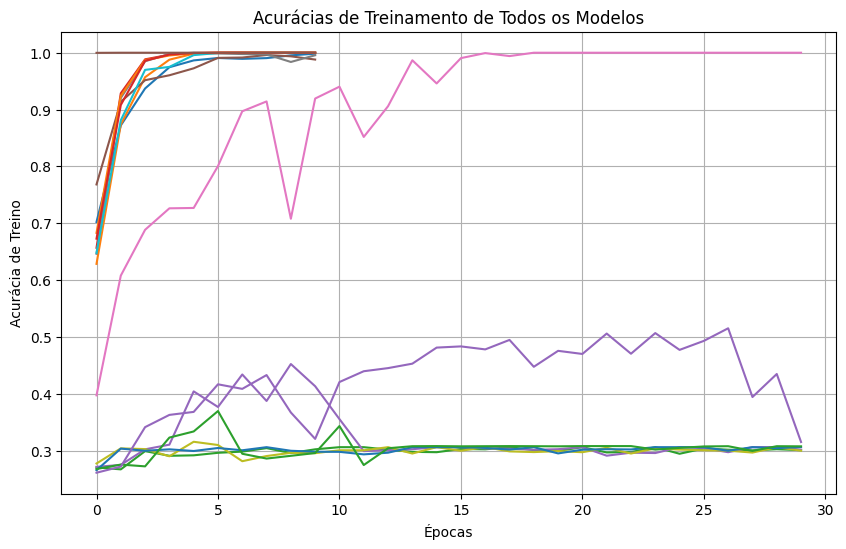

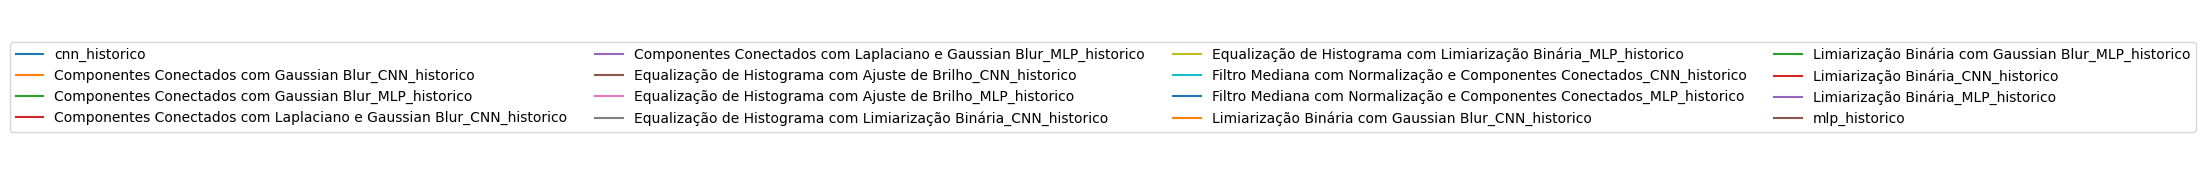

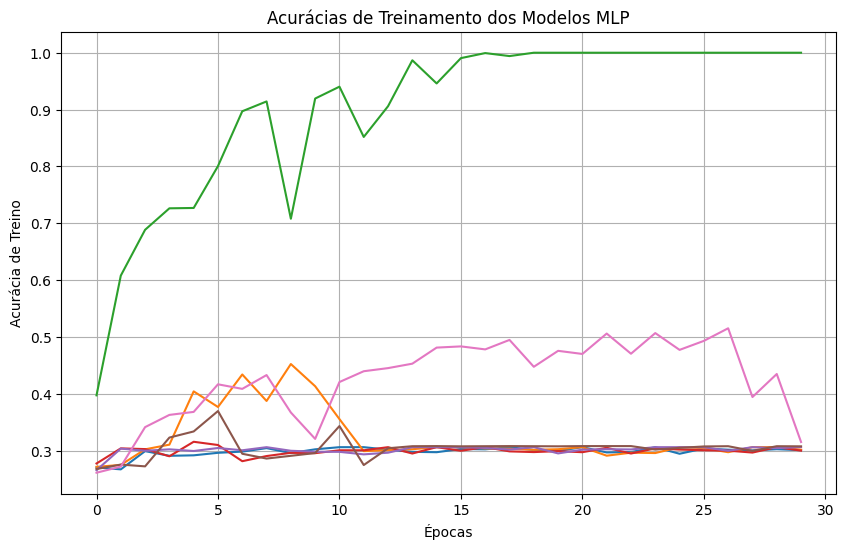

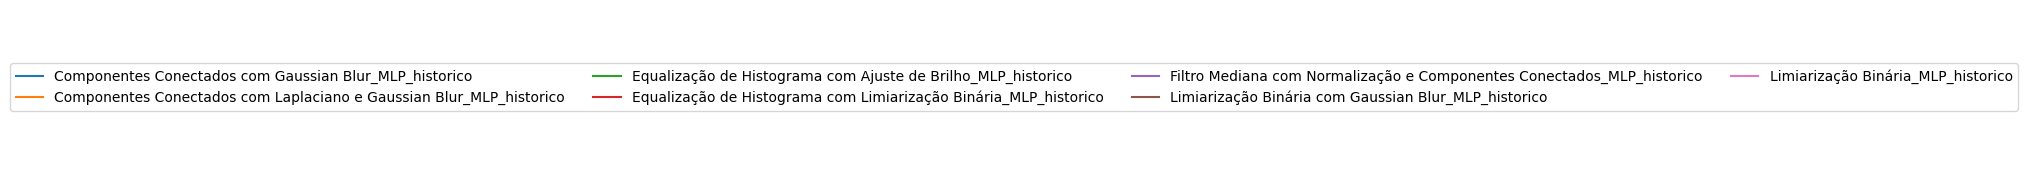

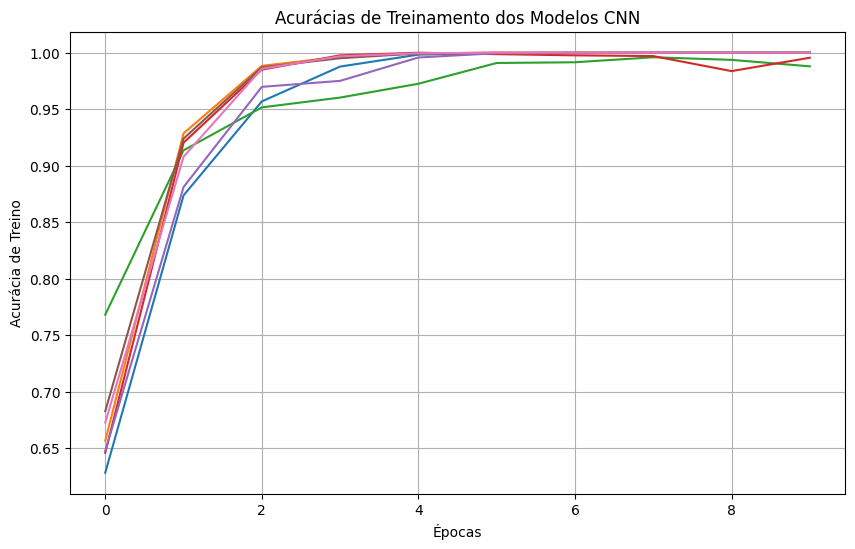

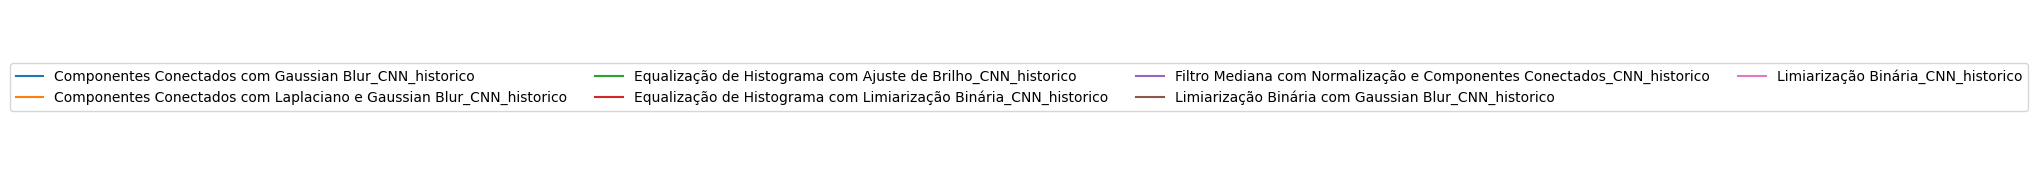

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Definir o caminho da pasta onde estão os históricos
caminho_historicos = 'historicos/'

# Função para carregar os históricos
def carregar_historicos(caminho):
    historicos = {}
    for arquivo in os.listdir(caminho):
        if arquivo.endswith('.npy'):  # Verificar se o arquivo é um .npy
            nome_modelo = arquivo.split('.')[0]  # Nome do modelo sem a extensão
            historicos[nome_modelo] = np.load(os.path.join(caminho, arquivo), allow_pickle=True).item()
    return historicos

# Carregar os históricos
historicos = carregar_historicos(caminho_historicos)

# Função para plotar as acurácias de treino e a legenda separadamente
def plotar_acuracias_treino_separado(historicos, titulo, filtro_modelos=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotar as curvas
    lines = []
    labels = []
    for nome_modelo, historico in historicos.items():
        if filtro_modelos is None or any(filtro in nome_modelo for filtro in filtro_modelos):
            train_accuracy = historico.get('accuracy', [])  # Mudança para 'accuracy' (acurácia de treino)
            if len(train_accuracy) > 0:
                line, = ax.plot(train_accuracy, label=nome_modelo)
                lines.append(line)
                labels.append(nome_modelo)
            else:
                print(f'Não foram encontrados dados de acurácia de treino para o modelo {nome_modelo}')
    
    ax.set_title(titulo)
    ax.set_xlabel('Épocas')
    ax.set_ylabel('Acurácia de Treino')
    ax.grid(True)

    # Plotar apenas as curvas sem a legenda
    plt.show()

    # Plotar a legenda separadamente
    fig_legend, ax_legend = plt.subplots(figsize=(10, 2))
    ax_legend.legend(lines, labels, loc='center', ncol=4)  # Ajuste o 'ncol' para o número de colunas na legenda
    ax_legend.axis('off')  # Remover os eixos da legenda
    plt.show()

# Plotar o gráfico com todas as acurácias no treino
plotar_acuracias_treino_separado(historicos, 'Acurácias de Treinamento de Todos os Modelos')

# Plotar o gráfico somente para MLP
plotar_acuracias_treino_separado(historicos, 'Acurácias de Treinamento dos Modelos MLP', filtro_modelos=['MLP'])

# Plotar o gráfico somente para CNN
plotar_acuracias_treino_separado(historicos, 'Acurácias de Treinamento dos Modelos CNN', filtro_modelos=['CNN'])
